<a href="https://colab.research.google.com/github/hajar-96/PythonBotAzure/blob/main/Copie_de_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn import tree


In [ ]:
# Read the dataset
link = "https://raw.githubusercontent.com/ianni-phd/Datasets/main/2022-12-05_soccer-players.csv"
df = pd.read_csv(link, sep=';', decimal=',')


In [ ]:
# Make the target binary
dict_2_classes = {"D":"other", 
                  "C":"other", 
                  "A":"strickers"}

df["Class"] = df["Class"].apply(lambda x: dict_2_classes[x])
classes_labels = list(pd.factorize(df["Class"])[1])
df["Class"] = pd.factorize(df["Class"])[0]
n_classes = len(classes_labels)


In [ ]:
# Define features variables and target
features = ["Marking","Shoot"] 
target = "Class"

X = df[features ].values
y = df["Class"].values


In [ ]:

# Modeling
clf = DecisionTreeClassifier()
clf.fit(X, y)
y_prev = clf.predict(X)


In [ ]:
# Compute metrics
accuracy = accuracy_score(y_prev, y)
print("Model Accuracy: ", accuracy)


Model Accuracy:  1.0


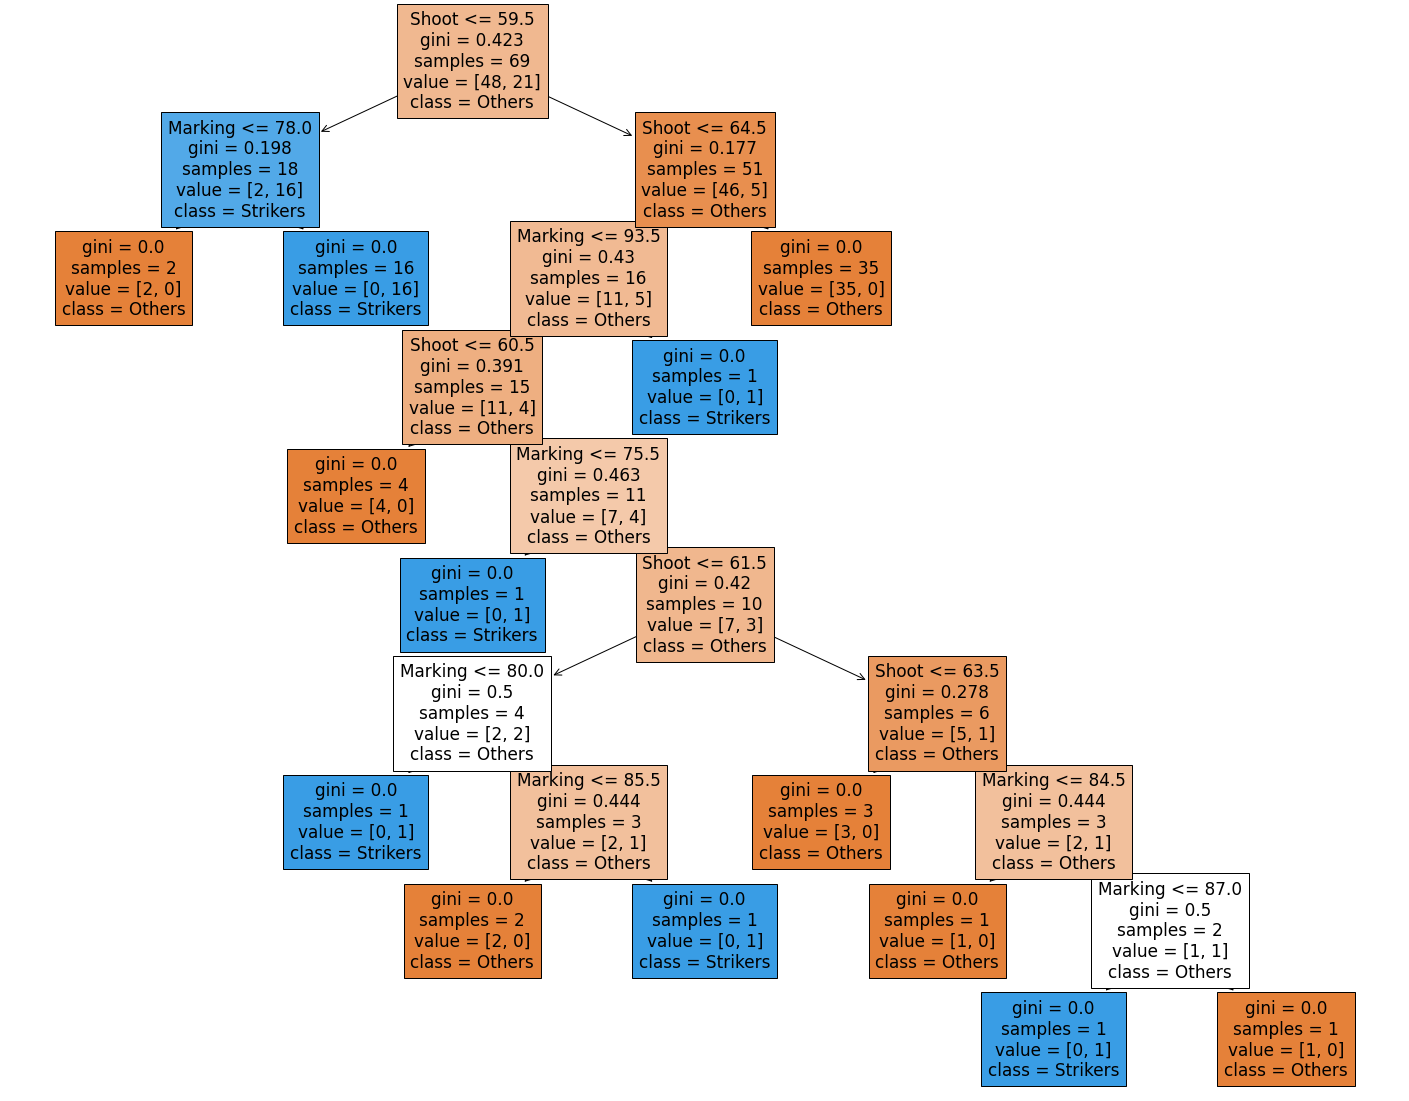

In [ ]:
# Visualizing the system of rules

fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(clf,
                  feature_names = ["Shoot","Marking"],
                  class_names = ["Others","Strikers"],
                  filled=True )


In [ ]:
##We limit the expansion of our tree, setting the min_sample_leaf (the minimum number of samples required to be at a leaf node) and the max_depth of the tree.
# Limited DT
clf = DecisionTreeClassifier(min_samples_leaf=2,
                              max_depth=3)  
clf.fit(X, y)
y_prev = clf.predict(X)
accuracy = accuracy_score(y_prev, y)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.927536231884058


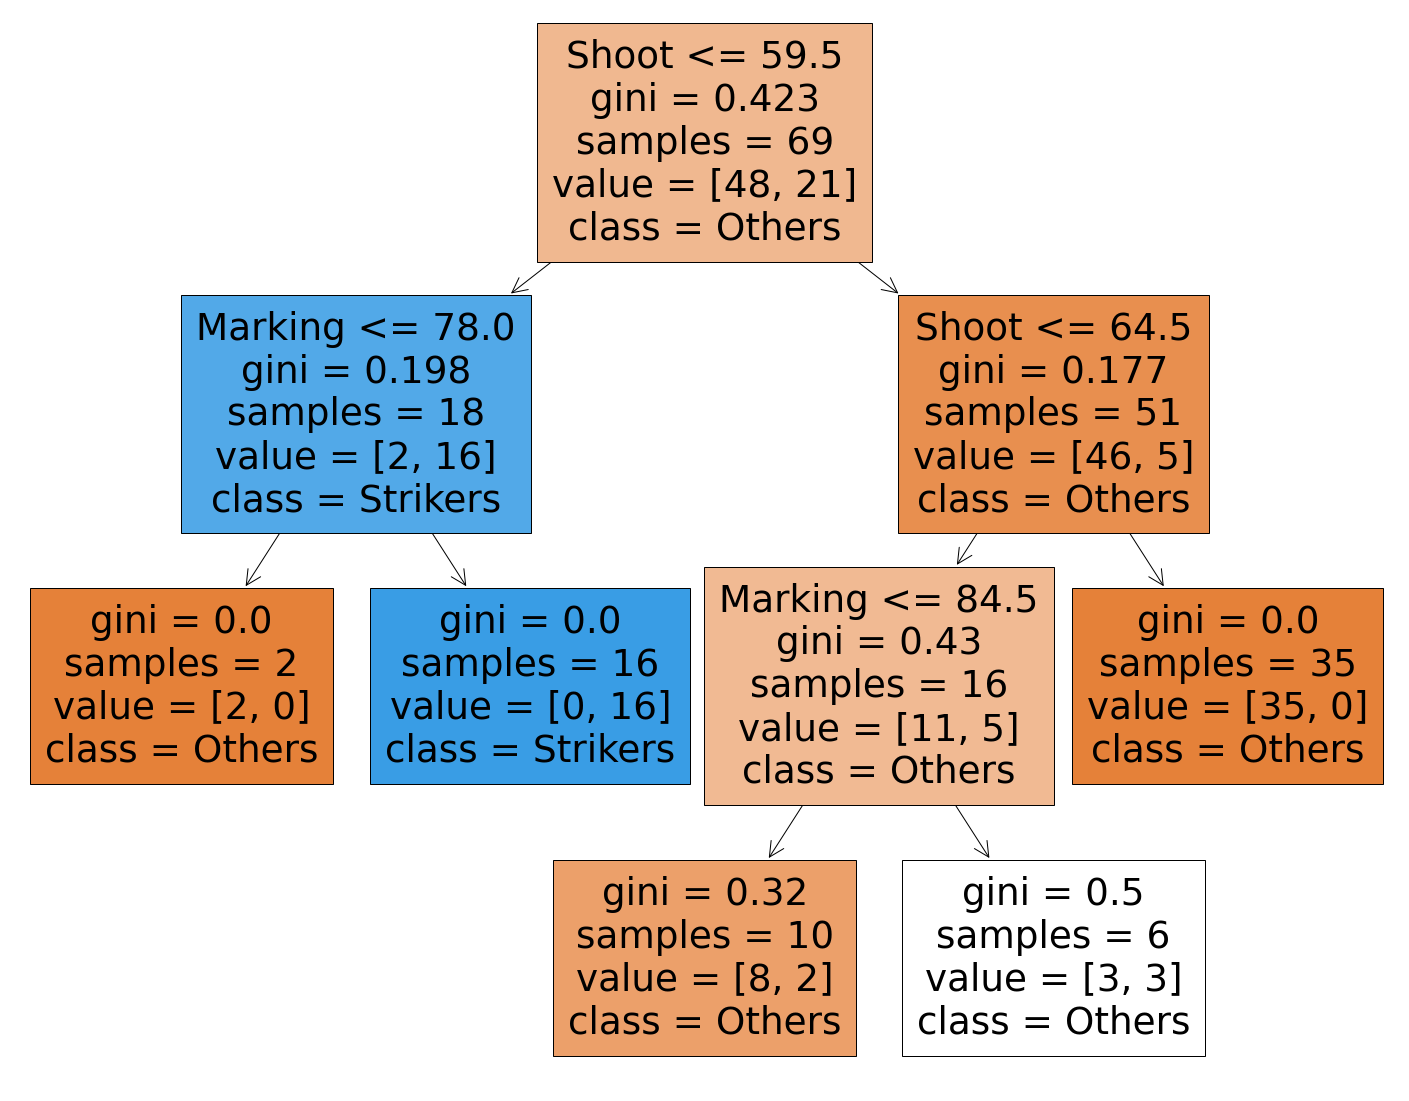

In [ ]:
# Same code used before...!
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(clf,
                  feature_names = ["Shoot","Marking"],
                  class_names = ["Others","Strikers"],
                  filled=True )

In [ ]:
#It is easy to see that the only players classified as strikers are the ones in the leaf defined by the following rule:
#['Shoot' > 59.5] AND ['Marking' <= 78.0]